In [2]:
# Our numerical workhorse
import numpy as np
import scipy.special
import pandas as pd

# Import pyplot for plotting
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D

# Seaborn, useful for graphics
import seaborn as sns

# Magic function to make matplotlib inline; other style specs must come AFTER
%matplotlib inline

# This enables high res graphics inline (only use with static plots (non-Bokeh))
# SVG is preferred, but there is a bug in Jupyter with vertical lines
%config InlineBackend.figure_formats = {'png', 'retina'}

# JB's favorite Seaborn settings for notebooks
rc = {'lines.linewidth': 2, 
      'axes.labelsize': 18, 
      'axes.titlesize': 18, 
      'axes.facecolor': 'DFDFE5'}
sns.set_context('notebook', rc=rc)
sns.set_style('darkgrid', rc=rc)

In [39]:
# load the data
df = pd.read_csv('data/130315_1_minute_intervals.csv',delimiter=',')
#take a look at the data
df

,fish,genotype,day,light,CLOCK,zeit,activity,window
0,FISH1,het,0,True,9.519,9.519,0.6,NaN
1,FISH1,het,0,True,9.536,9.536,1.9,NaN
2,FISH1,het,0,True,9.553,9.553,1.9,NaN
3,FISH1,het,0,True,9.569,9.569,13.4,NaN
4,FISH1,het,0,True,9.586,9.586,15.4,NaN
5,FISH1,het,0,True,9.603,9.603,12.7,NaN
6,FISH1,het,0,True,9.619,9.619,11.4,NaN
7,FISH1,het,0,True,9.636,9.636,11.6,NaN
8,FISH1,het,0,True,9.652,9.652,8.4,NaN
9,FISH1,het,0,True,9.669,9.669,3.2,8.050000e+01


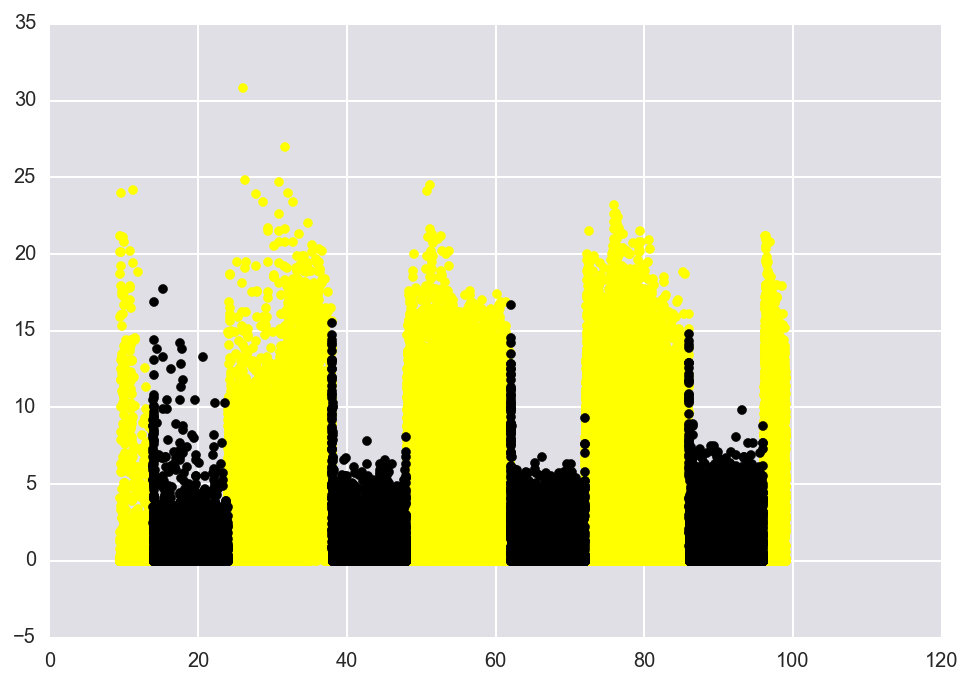

In [40]:
# Isolate wing data from all wild-type fish
wt = (df['genotype'] == 'wt')
wt_df = pd.DataFrame({'activity': df[wt]['activity'], 'zeit': df[wt]['zeit'], 'light': df[wt]['light']})

light_inds = wt_df['light']
dark_inds = ~light_inds
plt.scatter(wt_df[light_inds]['zeit'],wt_df[light_inds]['activity'], color = 'yellow')
plt.scatter(wt_df[dark_inds]['zeit'],wt_df[dark_inds]['activity'], color = 'black')



## Conclusions from wt
It appears that wild-type fish, for which we expect to see a distinct sleep behavior, are more active in the day than at night.  However, wild-type are still active at some points of the night (especially the beginning of the night) and are also inactive during the day.  
Therefore, both day and night distributions are sums of "sleep" and "awake" behavioral distributions
If we can figue out these distributions, we can define "sleep" and "awake"

(array([  4.90391839e-01,   8.68928253e-02,   2.92112299e-02,
          6.24442959e-03,   1.79924242e-03,   8.31582633e-04,
          6.95505475e-04,   4.23351159e-04,   3.02393685e-04,
          4.53590527e-05,   4.53590527e-05,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00]),
 array([  0.        ,   1.62105263,   3.24210526,   4.86315789,
          6.48421053,   8.10526316,   9.72631579,  11.34736842,
         12.96842105,  14.58947368,  16.21052632,  17.83157895,
         19.45263158,  21.07368421,  22.69473684,  24.31578947,
         25.93684211,  27.55789474,  29.17894737,  30.8       ]),
 <a list of 19 Patch objects>)

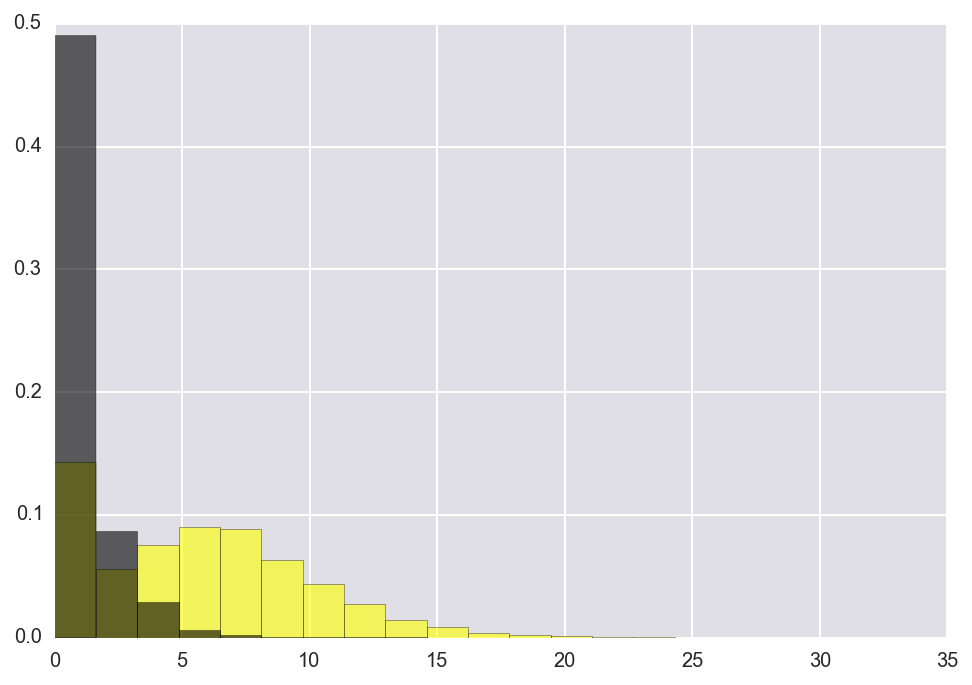

In [71]:
#Let's look at the activity distributions between day and night more closely

bin_edges = np.linspace(min(wt_df['activity']), max(wt_df['activity']), 20)
plt.hist(wt_df[light_inds]['activity'].tolist(), normed = True, alpha = 0.6, bins = bin_edges, color = 'yellow')
plt.hist(wt_df[dark_inds]['activity'].tolist(), normed = True, alpha = 0.6, bins = bin_edges, color = 'black')



In [92]:
# The 'day' histogram clearly contains significant populations of awake and asleep
#where is the boundary?
bin_edges = np.linspace(min(wt_df['activity']), max(wt_df['activity']), 80)
plt.hist(wt_df[light_inds]['activity'].tolist(), normed = True, alpha = 0.6, bins = bin_edges, color = 'yellow')
plt.hist(wt_df[dark_inds]['activity'].tolist(), normed = True, alpha = 0.6, bins = bin_edges, color = 'black')

//anaconda/lib/python3.4/site-packages/pandas/core/frame.py:1825: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


IndexingError: Unalignable boolean Series key provided

In [94]:
# The activity cutoff appears to be about 3
wt_day = [light_inds]['activity']
wt_night = [dark_inds]['activity']
wt_awakefrac_3 = np.sum(wt_day > 3) / np.sum(wt_day > -1)
wt_awakefrac_3 = (wt_awakefrac_3, np.sum(wt_night > 3) / np.sum(wt_night > -1))
wt_awakefrac_3

TypeError: list indices must be integers, not str

## Wild type thesholding
69% of the daytime, the wild-type fish are awake
7.5% of the nighttime, the wild-type fish are awake

NameError: name 'het_day' is not defined

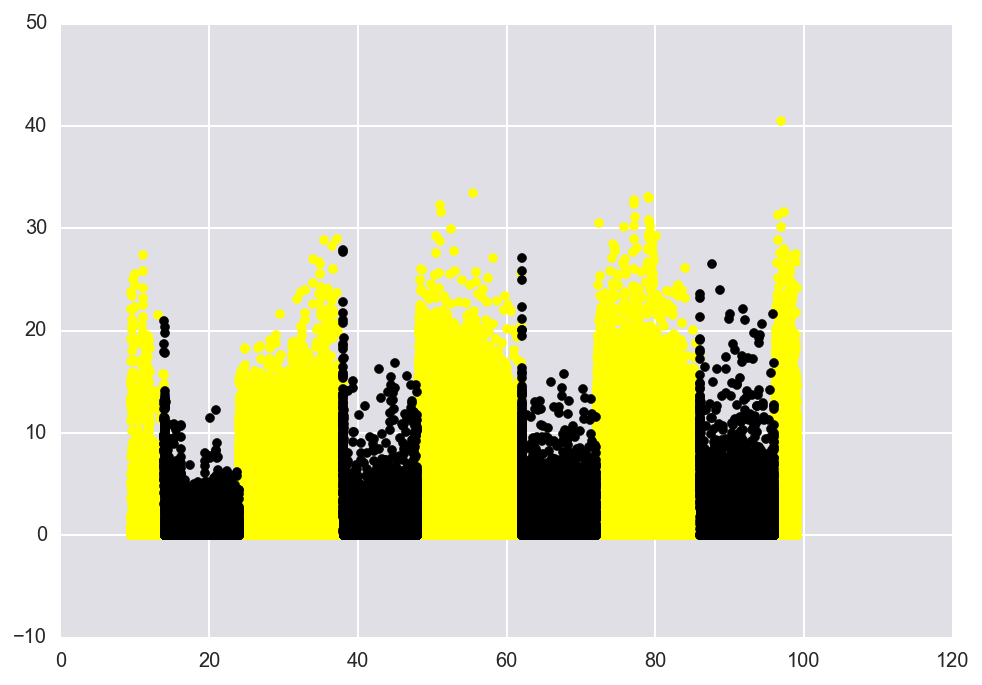

In [91]:
# Isolate wing data from all het fish
het = (df['genotype'] == 'het')
het_df = pd.DataFrame({'activity': df[het]['activity'], 'zeit': df[het]['zeit'], 'light': df[het]['light']})

light_inds = het_df['light']
dark_inds = ~light_inds
#plt.scatter(het_df[light_inds]['zeit'],het_df[light_inds]['activity'], color = 'yellow')
#plt.scatter(het_df[dark_inds]['zeit'],het_df[dark_inds]['activity'], color = 'black')

het_awakefrac_3 = np.sum(het_day > 3) / np.sum(het_day > -1)
het_awakefrac_3 = (het_awakefrac_3, np.sum(het_night > 3) / np.sum(het_night > -1))
het_awakefrac_3